<a href="https://colab.research.google.com/github/weibb123/SVMAlgorithm/blob/main/SVM_on_classifying_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use Support Vector machine to predict whether cancer is benign or malignant.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style('whitegrid')


In [2]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

col_names = list(cancer.feature_names)
col_names.append('target')
df = pd.DataFrame(np.c_[cancer.data, cancer.target], columns=col_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [3]:
df.shape

(569, 31)

excluding y(target) column, we have 30 features in total which means our hyperplane will be in 30th dimension
<br> our dataset has 569 total examples </br>

In [4]:
print(cancer.target_names)

['malignant' 'benign']


Showing that we have two classes 

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

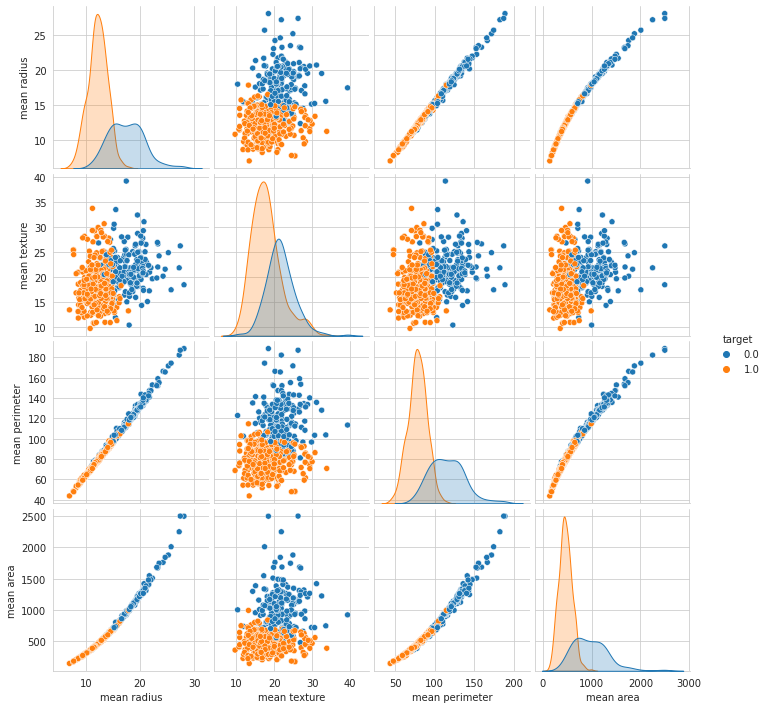

In [8]:
sns.pairplot(df, hue='target', vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


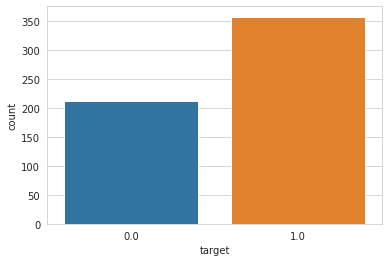

In [9]:
sns.countplot(df['target'], label='count')

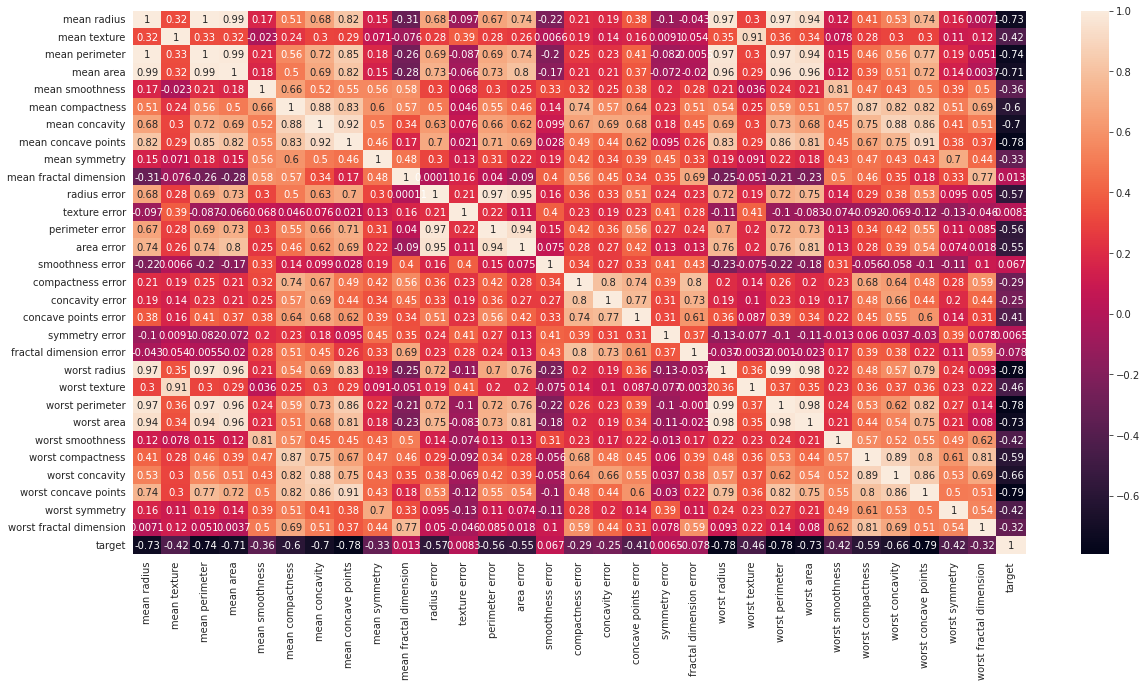

In [10]:
# Let's check the correlation between the variables 
# Strong correlation between the mean radius and mean perimeter, mean area and mean primeter
plt.figure(figsize=(20,10)) 
sns.heatmap(df.corr(), annot=True) 

# Model Training

In [13]:
#Feature Extraction
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X = df.drop('target', axis=1)
y = df.target

pipeline = Pipeline([
                     ('min_max_scaler', MinMaxScaler()),
                     ('std_scaler', StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def score(clf, X_train, y_train, X_test, y_test, train=True):
  """clf stands for classifer
  we will feed this function with a classifer and output score"""

  if train == True:
    pred = clf.predict(X_train)
    clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
    print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

  elif train == False:
    pred = clf.predict(X_test)
    clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
    print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
    print("_______________________________________________")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")


# SVM

In [15]:
from sklearn.svm import LinearSVC # Linear support vector classifier
from sklearn.svm import SVC #polynomial kernel SVM

As a rule of thumb, you should always try the linear kernel first, especially if the training set is very large or if it has plenty of features. If the training set is small, you should try the Gaussian RBF kernel as well.

# Data preparation before using SVM

SVM assumes that your data is numeric. If you have categorical data, you need to convert to binary dummy variable like 0 and 1.

<br> Basic SVM in this notebook can only be used to perform binary classification. Extension can be made to perform multi-classification.</br>

In [23]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.fit_transform(X_test)

"""Linear Kernel SVM"""
print("Linear Kernel SVM")
model = SVC(kernel='linear')
model.fit(X_train, y_train)

score(model, X_train, y_train, X_test, y_test, train=True)
score(model, X_train, y_train, X_test, y_test, train=False)

"""Polynomial Kernel SVM"""
print("")
print("Polynomial Kernel SVM")
model = SVC(kernel='poly', degree=2, gamma='auto')
model.fit(X_train, y_train)
score(model, X_train, y_train, X_test, y_test, train=True)
score(model, X_train, y_train, X_test, y_test, train=False)


"""Radial Kernel SVM"""
print("")
print("Radial Kernel SVM")
model = SVC(kernel='rbf', gamma=1)
model.fit(X_train, y_train)
score(model, X_train, y_train, X_test, y_test, train=True)
score(model, X_train, y_train, X_test, y_test, train=False)






Linear Kernel SVM
Accuracy Score: 98.68%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0        1.0  accuracy  macro avg  weighted avg
precision    0.982249    0.98951  0.986813    0.98588      0.986813
recall       0.982249    0.98951  0.986813    0.98588      0.986813
f1-score     0.982249    0.98951  0.986813    0.98588      0.986813
support    169.000000  286.00000  0.986813  455.00000    455.000000
Accuracy Score: 97.37%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   1.000000   0.959459  0.973684    0.979730      0.974751
recall      0.930233   1.000000  0.973684    0.965116      0.973684
f1-score    0.963855   0.979310  0.973684    0.971583      0.973481
support    43.000000  71.000000  0.973684  114.000000    114.000000

Polynomial Kernel SVM
Accuracy Score: 86.59%
_______________________________________________
CLASSIFICATION REPOR

# Support Vector Machine Hyperparameter Tuning

In [26]:
from sklearn.model_selection import GridSearchCV # Search for best hyperparameter for us

param_grid = {'C': [0.01, 0.1, 0.5, 1, 10, 100], 
              'gamma': [1, 0.75, 0.5, 0.25, 0.1, 0.01, 0.001], 
              'kernel': ['rbf', 'poly', 'linear']} 


grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid.fit(X_train, y_train)

best = grid.best_params_
print(f"Best params: {best}")

svm_clf = SVC(**best)
svm_clf.fit(X_train, y_train)
score(svm_clf, X_train, y_train, X_test, y_test, train=True)
score(svm_clf, X_train, y_train, X_test, y_test, train=False)


Fitting 5 folds for each of 126 candidates, totalling 630 fits
Best params: {'C': 0.5, 'gamma': 1, 'kernel': 'linear'}
Accuracy Score: 98.68%
_______________________________________________
CLASSIFICATION REPORT:
                  0.0         1.0  accuracy   macro avg  weighted avg
precision    0.988024    0.986111  0.986813    0.987068      0.986822
recall       0.976331    0.993007  0.986813    0.984669      0.986813
f1-score     0.982143    0.989547  0.986813    0.985845      0.986797
support    169.000000  286.000000  0.986813  455.000000    455.000000
Accuracy Score: 98.25%
_______________________________________________
CLASSIFICATION REPORT:
                 0.0        1.0  accuracy   macro avg  weighted avg
precision   1.000000   0.972603  0.982456    0.986301      0.982937
recall      0.953488   1.000000  0.982456    0.976744      0.982456
f1-score    0.976190   0.986111  0.982456    0.981151      0.982369
support    43.000000  71.000000  0.982456  114.000000    114.000000


Like what the gridsearch suggested, 
<br>Best params: {'C': 0.5, 'gamma': 1, 'kernel': 'linear'} is most suitable for this task. </br>